In [ ]:
pip install matplotlib-scalebar

In [ ]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import collections
import torch
import seaborn as sns
from itertools import product

from scipy.cluster.vq import kmeans2, whiten
from scipy.spatial.distance import cdist

In [ ]:
####################################################################################
#################  processing data for Figure7(a)  ################################
####################################################################################


drivepath = "Allmodes_total_count.shp"
gdf_all = gpd.read_file(drivepath)

medians = gdf_all[['esc_P', 'lim_P', 'cap_P', 'str_P']].median()

means = gdf_all[['esc_P', 'lim_P', 'cap_P', 'str_P']].mean()

counts = {column: {'greater_than_mean': 0, 'less_than_mean': 0} for column in means.index}

for column in means.index:
    counts[column]['greater_than_mean'] = (gdf_all[column] > means[column]).sum()
    counts[column]['less_than_mean'] = (gdf_all[column] < means[column]).sum()

quantiles = gdf_all[['esc_P', 'lim_P', 'cap_P', 'str_P']].quantile(0.5)

def categorize(value, q1):
    if value <= q1:
        return 1
    else:
        return 2

gdf_all['esc_C'] = gdf_all['esc_P'].apply(categorize, args=(quantiles['esc_P'],))
gdf_all['lim_C'] = gdf_all['lim_P'].apply(categorize, args=(quantiles['lim_P'],))
gdf_all['cap_C'] = gdf_all['cap_P'].apply(categorize, args=(quantiles['cap_P'],))
gdf_all['str_C'] = gdf_all['str_P'].apply(categorize, args=(quantiles['str_P'],))

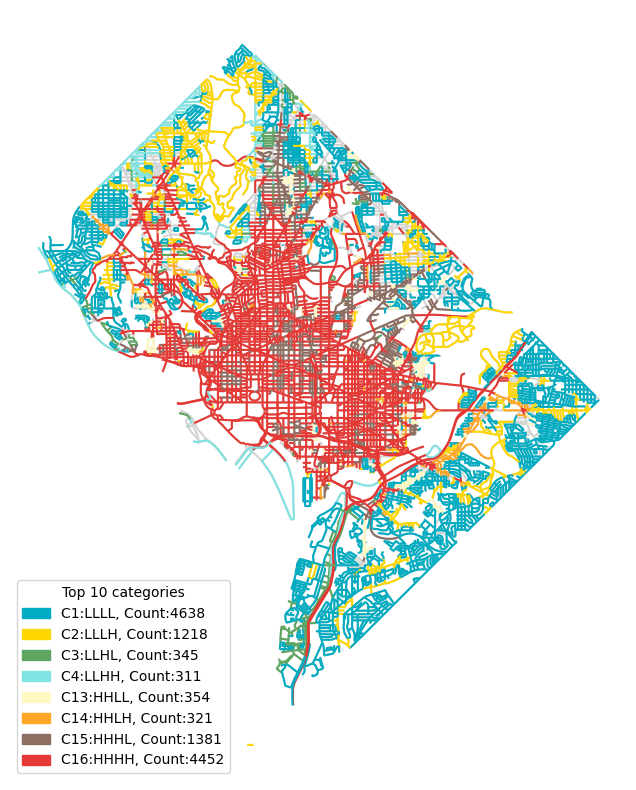

In [ ]:
####################################################################################
#################  this cell reproduce Figure7(a)  ################################
####################################################################################


# Define the mapping function to convert tuples to the desired string format (LLLL)
def map_tuple_to_string(tup):
    return ''.join('L' if x == 1 else 'H' for x in tup)

# Update the combination to map_c dictionary to use 'LLLL' instead of ('L', 'L', 'L', 'L')
combination_to_map_c_str = {map_tuple_to_string(comb): value for comb, value in combination_to_map_c.items()}

# Define a function to create the legend handles
def create_legend_handles_str():
    handles = []
    for value, color in color_map.items():
        if value in top_10_map_c_values:
            # Find the corresponding combination in 'LLLL' format
            comb_str = list(combination_to_map_c_str.keys())[list(combination_to_map_c_str.values()).index(value)]
            count = map_c_counts.get(value, 0)
            label = f'C{value}:{comb_str}, Count:{count}'
            handles.append(mpatches.Patch(color=color, label=label))
    return handles

# Create legend handles with the new 'LLLL' format
handles = create_legend_handles_str()

# Plotting the map with updated legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(ax=ax, color='lightgrey')  # Plot the background map
gdf_top_10.plot(ax=ax, color=gdf_top_10['color'], legend=False)  # Plot the top 10 categories

# Remove coordinate borders
ax.axis('off')

# Add the updated legend
plt.legend(handles=handles, title='Top 10 categories', loc='lower left')

# Show the plot
plt.show()


In [ ]:
####################################################################################
#################  processing data for Figure 6(a)  ################################
####################################################################################

drivepath = "four_modes.geojson"
merged_gdf = gpd.read_file(drivepath)

merged_gdf['LS_D1'] = merged_gdf[['LS_All_D_6', 'LS_All_D_7', 'LS_All_D_8', 'LS_All_D_9', 'LS_All_D_10']].sum(axis=1)
merged_gdf['LB_D1'] = merged_gdf[['LB_All_D_6', 'LB_All_D_7', 'LB_All_D_8', 'LB_All_D_9', 'LB_All_D_10']].sum(axis=1)
merged_gdf['CB_D1'] = merged_gdf[['CB_All_D_6', 'CB_All_D_7', 'CB_All_D_8', 'CB_All_D_9', 'CB_All_D_10']].sum(axis=1)
merged_gdf['ST_D1'] = merged_gdf[['ST_All_D_6', 'ST_All_D_7', 'ST_All_D_8', 'ST_All_D_9', 'ST_All_D_10']].sum(axis=1)

merged_gdf['LS_D3'] = merged_gdf[['LS_All_D_16', 'LS_All_D_17', 'LS_All_D_18', 'LS_All_D_19', 'LS_All_D_20']].sum(axis=1)
merged_gdf['LB_D3'] = merged_gdf[['LB_All_D_16', 'LB_All_D_17', 'LB_All_D_18', 'LB_All_D_19', 'LB_All_D_20']].sum(axis=1)
merged_gdf['CB_D3'] = merged_gdf[['CB_All_D_16', 'CB_All_D_17', 'CB_All_D_18', 'CB_All_D_19', 'CB_All_D_20']].sum(axis=1)
merged_gdf['ST_D3'] = merged_gdf[['ST_All_D_16', 'ST_All_D_17', 'ST_All_D_18', 'ST_All_D_19', 'ST_All_D_20']].sum(axis=1)

merged_gdf['LS_Y3'] = merged_gdf[['LS_All_Y_16', 'LS_All_Y_17', 'LS_All_Y_18', 'LS_All_Y_19', 'LS_All_Y_20']].sum(axis=1)
merged_gdf['LB_Y3'] = merged_gdf[['LB_All_Y_16', 'LB_All_Y_17', 'LB_All_Y_18', 'LB_All_Y_19', 'LB_All_Y_20']].sum(axis=1)
merged_gdf['CB_Y3'] = merged_gdf[['CB_All_Y_16', 'CB_All_Y_17', 'CB_All_Y_18', 'CB_All_Y_19', 'CB_All_Y_20']].sum(axis=1)
merged_gdf['ST_Y3'] = merged_gdf[['ST_All_Y_16', 'ST_All_Y_17', 'ST_All_Y_18', 'ST_All_Y_19', 'ST_All_Y_20']].sum(axis=1)

merged_gdf['LS_Y4'] = merged_gdf[['LS_All_Y_21', 'LS_All_Y_22', 'LS_All_Y_23', 'LS_All_Y_0', 'LS_All_Y_1']].sum(axis=1)
merged_gdf['LB_Y4'] = merged_gdf[['LB_All_Y_21', 'LB_All_Y_22', 'LB_All_Y_23', 'LB_All_Y_0', 'LB_All_Y_1']].sum(axis=1)
merged_gdf['CB_Y4'] = merged_gdf[['CB_All_Y_21', 'CB_All_Y_22', 'CB_All_Y_23', 'CB_All_Y_0', 'CB_All_Y_1']].sum(axis=1)
merged_gdf['ST_Y4'] = merged_gdf[['ST_All_Y_21', 'ST_All_Y_22', 'ST_All_Y_23', 'ST_All_Y_0', 'ST_All_Y_1']].sum(axis=1)

export_columns = [
    'LS_D1', 'LB_D1', 'CB_D1', 'ST_D1',
    'LS_D3', 'LB_D3', 'CB_D3', 'ST_D3',
    'LS_Y3', 'LB_Y3', 'CB_Y3', 'ST_Y3',
    'LS_Y4', 'LB_Y4', 'CB_Y4', 'ST_Y4',
    'geometry'
]
export_gdf = merged_gdf[export_columns]

export_gdf.to_file("colormap_period.geojson", driver='GeoJSON')

gdf_all=export_gdf.copy()

gdf_al = gdf_al.drop(index=5242)


quantiles = gdf_all[['LS_D1', 'LB_D1', 'CB_D1', 'ST_D1']].quantile(0.5)

def categorize(value, q1):
    if value <= q1:
        return 1
    else:
        return 2

gdf_all['LS_D1_C'] = gdf_all['LS_D1'].apply(categorize, args=(quantiles['LS_D1'],))
gdf_all['LB_D1_C'] = gdf_all['LB_D1'].apply(categorize, args=(quantiles['LB_D1'],))
gdf_all['CB_D1_C'] = gdf_all['CB_D1'].apply(categorize, args=(quantiles['CB_D1'],))
gdf_all['ST_D1_C'] = gdf_all['ST_D1'].apply(categorize, args=(quantiles['ST_D1'],))

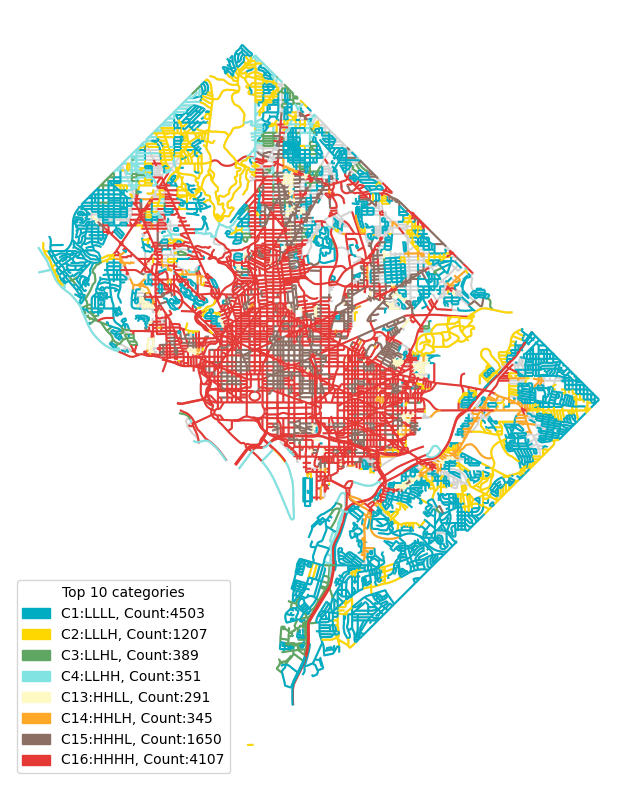

In [ ]:
####################################################################################
#################  this cell reproduce Figure6(a)  ################################
####################################################################################


# Define the mapping function to convert tuples to the desired string format (LLLL)
def map_tuple_to_string(tup):
    return ''.join('L' if x == 1 else 'H' for x in tup)

# Update the combination to map_c dictionary to use 'LLLL' instead of ('L', 'L', 'L', 'L')
combination_to_map_c_str = {map_tuple_to_string(comb): value for comb, value in combination_to_map_c.items()}

# Define a function to create the legend handles
def create_legend_handles_str():
    handles = []
    for value, color in color_map.items():
        if value in top_10_map_c_values:
            # Find the corresponding combination in 'LLLL' format
            comb_str = list(combination_to_map_c_str.keys())[list(combination_to_map_c_str.values()).index(value)]
            count = map_c_counts.get(value, 0)
            label = f'C{value}:{comb_str}, Count:{count}'
            handles.append(mpatches.Patch(color=color, label=label))
    return handles

# Create legend handles with the new 'LLLL' format
handles = create_legend_handles_str()

# Plotting the map with updated legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(ax=ax, color='lightgrey')  # Plot the background map
gdf_top_10.plot(ax=ax, color=gdf_top_10['color'], legend=False)  # Plot the top 10 categories

# Remove coordinate borders
ax.axis('off')

# Add the updated legend
plt.legend(handles=handles, title='Top 10 categories', loc='lower left')

# Show the plot
plt.show()


In [ ]:
####################################################################################
#################  processing data for Figure 6(b)  ################################
####################################################################################

quantiles = gdf_all[['LS_Y4', 'LB_Y4', 'CB_Y4', 'ST_Y4']].quantile(0.5)

def categorize(value, q1):
    if value <= q1:
        return 1
    else:
        return 2

gdf_all['LS_Y4_C'] = gdf_all['LS_Y4'].apply(categorize, args=(quantiles['LS_Y4'],))
gdf_all['LB_Y4_C'] = gdf_all['LB_Y4'].apply(categorize, args=(quantiles['LB_Y4'],))
gdf_all['CB_Y4_C'] = gdf_all['CB_Y4'].apply(categorize, args=(quantiles['CB_Y4'],))
gdf_all['ST_Y4_C'] = gdf_all['ST_Y4'].apply(categorize, args=(quantiles['ST_Y4'],))

print(gdf_all.head())


   LS_D1  LB_D1  CB_D1  ST_D1  LS_D3  LB_D3  CB_D3  ST_D3  LS_Y3  LB_Y3  ...  \
0     19      6     70      8     16      6     92      0     78     35  ...   
1   2036   1161   7320      5   5317   2299  13087      1  15568   9140  ...   
2     79     51    148      1    195     79    195      2    580    213  ...   
3     11      2      0      0     30     21      0      0    109     25  ...   
4      2      2     27      4      7      2     42      0     24     11  ...   

   map_D3  LS_Y3_C  LB_Y3_C  CB_Y3_C  ST_Y3_C  map_Y3 LS_Y4_C  LB_Y4_C  \
0       1        1        1        1        2       2       1        1   
1      16        2        2        2        2      16       2        2   
2      16        2        2        2        2      16       2        2   
3       1        1        1        1        1       1       1        1   
4       1        1        1        1        2       2       1        1   

   CB_Y4_C  ST_Y4_C  
0        1        1  
1        2        1  
2       

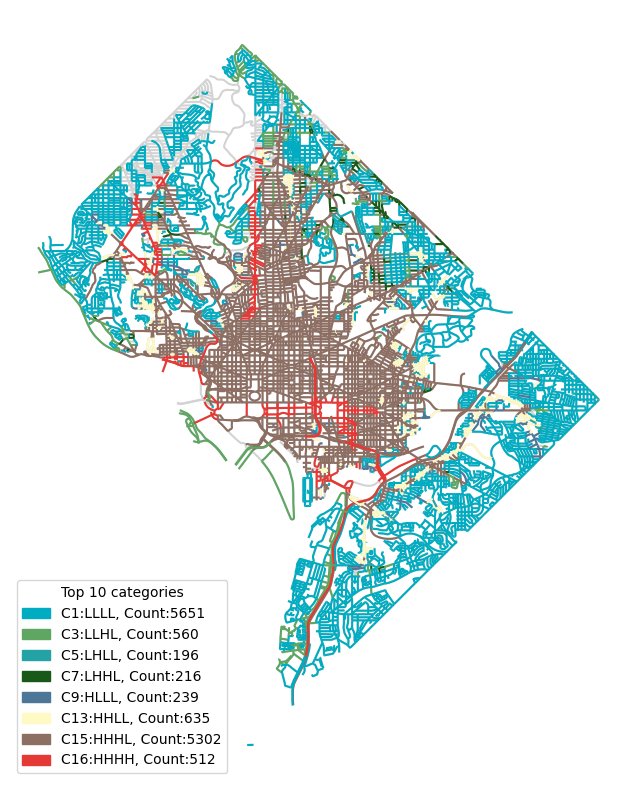

In [ ]:
####################################################################################
#################  this cell reproduce Figure6(b)  ################################
####################################################################################

# Define the mapping function to convert tuples to the desired string format (LLLL)
def map_tuple_to_string(tup):
    return ''.join('L' if x == 1 else 'H' for x in tup)

# Update the combination to map_c dictionary to use 'LLLL' instead of ('L', 'L', 'L', 'L')
combination_to_map_c_str = {map_tuple_to_string(comb): value for comb, value in combination_to_map_c.items()}

# Define a function to create the legend handles
def create_legend_handles_str():
    handles = []
    for value, color in color_map.items():
        if value in top_10_map_c_values:
            # Find the corresponding combination in 'LLLL' format
            comb_str = list(combination_to_map_c_str.keys())[list(combination_to_map_c_str.values()).index(value)]
            count = map_c_counts.get(value, 0)
            label = f'C{value}:{comb_str}, Count:{count}'
            handles.append(mpatches.Patch(color=color, label=label))
    return handles

# Create legend handles with the new 'LLLL' format
handles = create_legend_handles_str()

# Plotting the map with updated legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(ax=ax, color='lightgrey')  # Plot the background map
gdf_top_10.plot(ax=ax, color=gdf_top_10['color'], legend=False)  # Plot the top 10 categories

# Remove coordinate borders
ax.axis('off')

# Add the updated legend
plt.legend(handles=handles, title='Top 10 categories', loc='lower left')

# Show the plot
plt.show()


In [ ]:
####################################################################################
#################  processing data for Figure 6(c)  ################################
####################################################################################

quantiles = gdf_all[['LS_D3', 'LB_D3', 'CB_D3', 'ST_D3']].quantile(0.5)

def categorize(value, q1):
    if value <= q1:
        return 1
    else:
        return 2

gdf_all['LS_D3_C'] = gdf_all['LS_D3'].apply(categorize, args=(quantiles['LS_D3'],))
gdf_all['LB_D3_C'] = gdf_all['LB_D3'].apply(categorize, args=(quantiles['LB_D3'],))
gdf_all['CB_D3_C'] = gdf_all['CB_D3'].apply(categorize, args=(quantiles['CB_D3'],))
gdf_all['ST_D3_C'] = gdf_all['ST_D3'].apply(categorize, args=(quantiles['ST_D3'],))

print(gdf_all.head())


   LS_D1  LB_D1  CB_D1  ST_D1  LS_D3  LB_D3  CB_D3  ST_D3  LS_Y3  LB_Y3  ...  \
0     19      6     70      8     16      6     92      0     78     35  ...   
1   2036   1161   7320      5   5317   2299  13087      1  15568   9140  ...   
2     79     51    148      1    195     79    195      2    580    213  ...   
3     11      2      0      0     30     21      0      0    109     25  ...   
4      2      2     27      4      7      2     42      0     24     11  ...   

                                            geometry  LS_D1_C  LB_D1_C  \
0  LINESTRING Z (397105.011 146144.556 0.000, 397...        1        1   
1  LINESTRING Z (396929.591 137710.495 0.000, 396...        2        2   
2  LINESTRING Z (396634.181 140701.755 0.000, 396...        2        2   
3  LINESTRING Z (391818.710 139157.575 0.000, 391...        1        1   
4  LINESTRING Z (396852.843 146890.302 0.000, 396...        1        1   

   CB_D1_C  ST_D1_C  map_D1 LS_D3_C  LB_D3_C  CB_D3_C  ST_D3_C  
0        

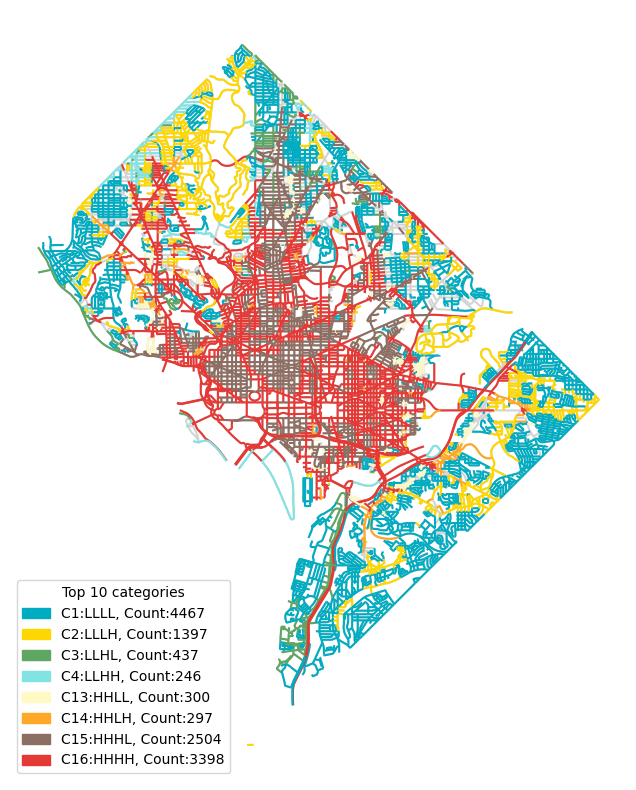

In [ ]:
####################################################################################
#################  this cell reproduce Figure6(c)  ################################
####################################################################################


# Define the mapping function to convert tuples to the desired string format (LLLL)
def map_tuple_to_string(tup):
    return ''.join('L' if x == 1 else 'H' for x in tup)

# Update the combination to map_c dictionary to use 'LLLL' instead of ('L', 'L', 'L', 'L')
combination_to_map_c_str = {map_tuple_to_string(comb): value for comb, value in combination_to_map_c.items()}

# Define a function to create the legend handles
def create_legend_handles_str():
    handles = []
    for value, color in color_map.items():
        if value in top_10_map_c_values:
            # Find the corresponding combination in 'LLLL' format
            comb_str = list(combination_to_map_c_str.keys())[list(combination_to_map_c_str.values()).index(value)]
            count = map_c_counts.get(value, 0)
            label = f'C{value}:{comb_str}, Count:{count}'
            handles.append(mpatches.Patch(color=color, label=label))
    return handles

# Create legend handles with the new 'LLLL' format
handles = create_legend_handles_str()

# Plotting the map with updated legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(ax=ax, color='lightgrey')  # Plot the background map
gdf_top_10.plot(ax=ax, color=gdf_top_10['color'], legend=False)  # Plot the top 10 categories

# Remove coordinate borders
ax.axis('off')

# Add the updated legend
plt.legend(handles=handles, title='Top 10 categories', loc='lower left')

# Show the plot
plt.show()


In [ ]:
####################################################################################
#################  processing data for Figure 6(d)  ################################
####################################################################################

quantiles = gdf_all[['LS_Y3', 'LB_Y3', 'CB_Y3', 'ST_Y3']].quantile(0.5)

def categorize(value, q1):
    if value <= q1:
        return 1
    else:
        return 2

gdf_all['LS_Y3_C'] = gdf_all['LS_Y3'].apply(categorize, args=(quantiles['LS_Y3'],))
gdf_all['LB_Y3_C'] = gdf_all['LB_Y3'].apply(categorize, args=(quantiles['LB_Y3'],))
gdf_all['CB_Y3_C'] = gdf_all['CB_Y3'].apply(categorize, args=(quantiles['CB_Y3'],))
gdf_all['ST_Y3_C'] = gdf_all['ST_Y3'].apply(categorize, args=(quantiles['ST_Y3'],))

print(gdf_all.head())


   LS_D1  LB_D1  CB_D1  ST_D1  LS_D3  LB_D3  CB_D3  ST_D3  LS_Y3  LB_Y3  ...  \
0     19      6     70      8     16      6     92      0     78     35  ...   
1   2036   1161   7320      5   5317   2299  13087      1  15568   9140  ...   
2     79     51    148      1    195     79    195      2    580    213  ...   
3     11      2      0      0     30     21      0      0    109     25  ...   
4      2      2     27      4      7      2     42      0     24     11  ...   

   map_D1  LS_D3_C  LB_D3_C  CB_D3_C  ST_D3_C  map_D3 LS_Y3_C  LB_Y3_C  \
0       2        1        1        1        1       1       1        1   
1      16        2        2        2        2      16       2        2   
2      15        2        2        2        2      16       2        2   
3       1        1        1        1        1       1       1        1   
4       2        1        1        1        1       1       1        1   

   CB_Y3_C  ST_Y3_C  
0        1        2  
1        2        2  
2       

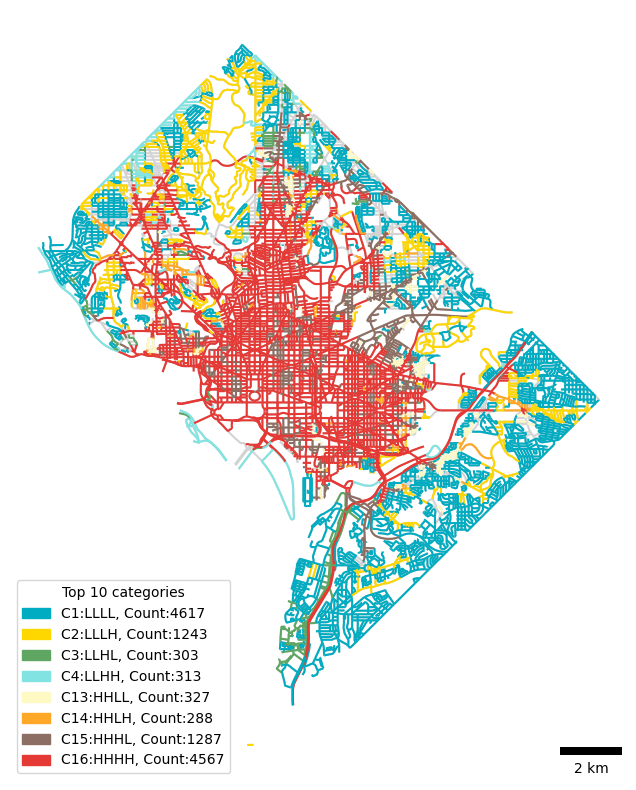

In [ ]:
####################################################################################
#################  this cell reproduce Figure6(d)  ################################
####################################################################################

from matplotlib_scalebar.scalebar import ScaleBar
# Define the mapping function to convert tuples to the desired string format (LLLL)
def map_tuple_to_string(tup):
    return ''.join('L' if x == 1 else 'H' for x in tup)

# Update the combination to map_c dictionary to use 'LLLL' instead of ('L', 'L', 'L', 'L')
combination_to_map_c_str = {map_tuple_to_string(comb): value for comb, value in combination_to_map_c.items()}

# Define a function to create the legend handles
def create_legend_handles_str():
    handles = []
    for value, color in color_map.items():
        if value in top_10_map_c_values:
            # Find the corresponding combination in 'LLLL' format
            comb_str = list(combination_to_map_c_str.keys())[list(combination_to_map_c_str.values()).index(value)]
            count = map_c_counts.get(value, 0)
            label = f'C{value}:{comb_str}, Count:{count}'
            handles.append(mpatches.Patch(color=color, label=label))
    return handles

# Create legend handles with the new 'LLLL' format
handles = create_legend_handles_str()

# Plotting the map with updated legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(ax=ax, color='lightgrey')  # Plot the background map
gdf_top_10.plot(ax=ax, color=gdf_top_10['color'], legend=False)  # Plot the top 10 categories

# # Add scale bar
scalebar = ScaleBar(1, location='lower right')  # 1 unit in your CRS corresponds to 1 meter
ax.add_artist(scalebar)
# Remove coordinate borders
ax.axis('off')

# Add the updated legend
plt.legend(handles=handles, title='Top 10 categories', loc='lower left')

# Show the plot
plt.show()


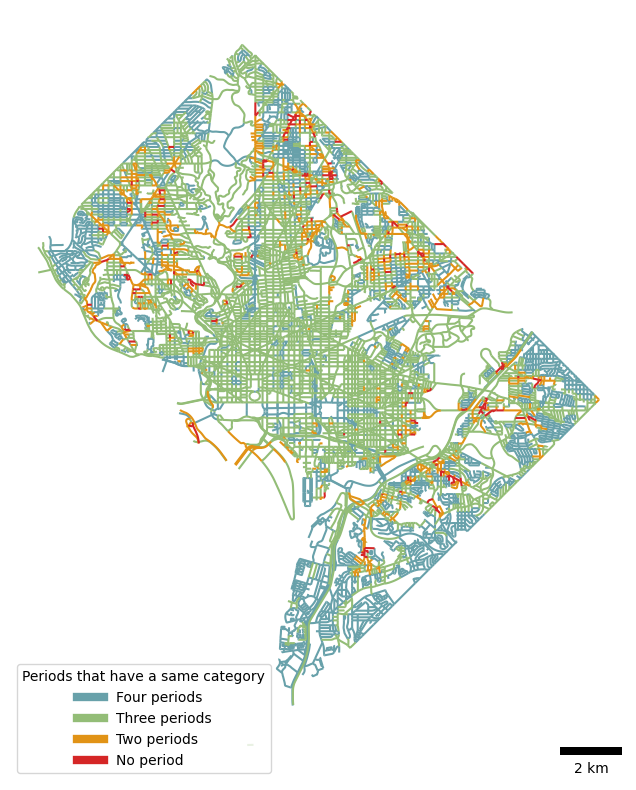

In [ ]:
####################################################################################
#################  this cell reproduce Figure7(b)  ################################
####################################################################################


# Define the custom line width for the legend
legend_line_width = 6  # Adjust this value for thicker lines in the legend

# Create custom legend handles with the desired line width
legend_handles = {
    '#68a1aa': mlines.Line2D([], [], color='#68a1aa', linewidth=legend_line_width, label='Four periods'),
    '#93bd77': mlines.Line2D([], [], color='#93bd77', linewidth=legend_line_width, label='Three periods'),
    '#e19316': mlines.Line2D([], [], color='#e19316', linewidth=legend_line_width, label='Two periods'),
    '#d52626': mlines.Line2D([], [], color='#d52626', linewidth=legend_line_width, label='No period')
}

# Plotting the main map without changing line thickness
fig, ax = plt.subplots(figsize=(10, 10))

for color, data in color_map.items():
    data.plot(ax=ax, color=color)  # Keep original line thickness in the plot

# Remove coordinate borders
ax.axis('off')
# # Add scale bar
scalebar = ScaleBar(1, location='lower right')  # 1 unit in your CRS corresponds to 1 meter
ax.add_artist(scalebar)
# Add the custom legend with thicker lines
plt.legend(handles=[legend_handles[color] for color in legend_handles], title='Periods that have a same category', loc='lower left')

plt.show()
